In [47]:
import numpy as np
import pandas as pd

In [48]:
iris = pd.read_csv("iris.csv")

In [49]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [50]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [51]:
X = iris.drop('species',axis=1)
y = iris['species']

In [52]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [54]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [57]:
scaler = MinMaxScaler()

In [58]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [59]:
scaled_X_train = scaler.transform(X_train)

In [60]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\nefth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(patience=10)

In [65]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2985 - loss: 1.1255 - val_accuracy: 0.4000 - val_loss: 1.0818
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3496 - loss: 1.0998 - val_accuracy: 0.4000 - val_loss: 1.0798
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3079 - loss: 1.1107 - val_accuracy: 0.4000 - val_loss: 1.0780
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3017 - loss: 1.1097 - val_accuracy: 0.4000 - val_loss: 1.0762
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3069 - loss: 1.1079 - val_accuracy: 0.4000 - val_loss: 1.0747
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3027 - loss: 1.1032 - val_accuracy: 0.4000 - val_loss: 1.0731
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3496 - loss: 1.0838 - val_accuracy: 0.4000 - val_loss: 1.0715
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3381 - loss: 1.0887 - val_accuracy: 0.4000 - val_loss:

## Model Evaluation

In [66]:
metrics = pd.DataFrame(model.history.history)

In [67]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.316667,1.116506,0.400000,1.081776
1,0.316667,1.112468,0.400000,1.079794
2,0.316667,1.109283,0.400000,1.077957
3,0.316667,1.105709,0.400000,1.076249
4,0.316667,1.102350,0.400000,1.074674
...,...,...,...,...
295,0.700000,0.586991,0.633333,0.629718
296,0.700000,0.586070,0.633333,0.628856
297,0.700000,0.585211,0.633333,0.627998
298,0.700000,0.584299,0.633333,0.626904


<Axes: >

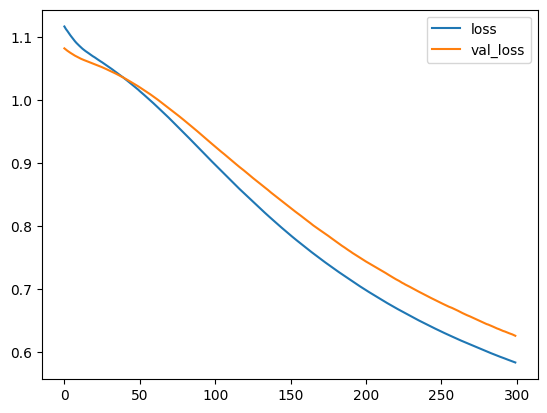

In [68]:
metrics[['loss','val_loss']].plot()

<Axes: >

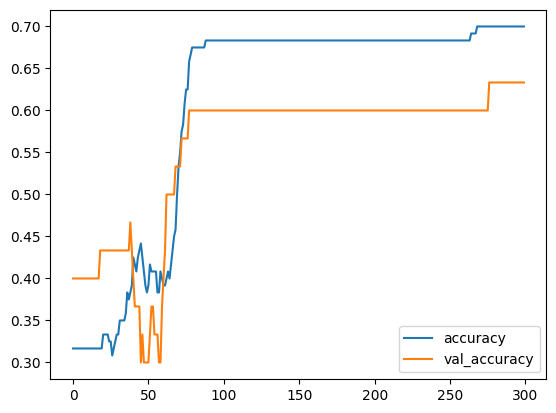

In [69]:
metrics[['accuracy','val_accuracy']].plot()

In [70]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.6257928609848022, 0.6333333253860474]

## Ready Model for Deployment

In [71]:
epochs = len(metrics)

In [72]:
scaled_X = scaler.fit_transform(X)

In [73]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0997 - loss: 1.2649  
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1097 - loss: 1.2148 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0906 - loss: 1.2402 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0963 - loss: 1.2052 
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1093 - loss: 1.2146 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1028 - loss: 1.1863 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0977 - loss: 1.1809 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1251 - loss: 1.1895 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1347 - loss: 1.1672 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1495 - loss: 1.1661 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1312 - loss: 1.1711 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1148 - loss: 1.1456 


In [75]:
model.save("final_iris_model.keras")

### Saving Scaler

In [76]:
import joblib

In [77]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [78]:
from tensorflow.keras.models import load_model

In [79]:

from tensorflow.keras.models import load_model
import joblib

flower_model = load_model("final_iris_model.keras")
flower_scaler = joblib.load("iris_scaler.pkl")

In [80]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [81]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [82]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [83]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
def return_prediction(model,scaler,sample_json):
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    
    class_ind = np.argmax(model.predict(flower), axis=1)
    return classes[class_ind[0]]

In [90]:
return_prediction(flower_model,flower_scaler,flower_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\nefth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.str_('setosa')

# CODE FOR DEPLOYMENT:

In [91]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.keras")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = np.argmax(model.predict(flower), axis=1)
    return classes[class_ind[0]]

In [92]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}

In [93]:
return_prediction(flower_model,flower_scaler,flower_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\nefth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.str_('setosa')